<a href="https://www.kaggle.com/code/notsau/simple-regression-for-ad-type?scriptVersionId=161449641" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/advertising-dataset/Advertising.csv")

# EDA

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 200 entries, 0 to 199

Data columns (total 4 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   TV         200 non-null    float64

 1   Radio      200 non-null    float64

 2   Newspaper  200 non-null    float64

 3   Sales      200 non-null    float64

dtypes: float64(4)

memory usage: 6.4 KB


In [6]:
df.corr(numeric_only=True)
#satış tv'de daha fazla etkiliyomuş gibi duruyo

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [7]:
df['Sales'].max()

27.0

# Feature Engineering and Modelling

In [8]:
x=df[["Newspaper","Radio","TV"]]
y=df[["Sales"]]
#fiyat tahmini yapacağımız için y'ye eşitledik

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#test_size : %20sini tahmin için ayırdık
#random_state=42 : seed olarak 42 seçtik

In [11]:
from sklearn.linear_model import LinearRegression
#eğitim motoru

In [12]:
lr=LinearRegression()

In [13]:
model=lr.fit(x_train,y_train)
#modeli traine yani eğitim dosyalarına eşitledik

In [14]:
tahmin=model.predict(x_test)
#tahmini model

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
#tahmin motoru ve başarı oranı karşılaştırma

In [16]:
r2_score(tahmin,y_test)

0.8791069137120034

In [17]:
mean_squared_error(tahmin,y_test)**.5

1.7815996615334497

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
y_test["tahmin"]=tahmin

In [23]:
y_test.index

Int64Index([ 95,  15,  30, 158, 128, 115,  69, 170, 174,  45,  66, 182, 165,
             78, 186, 177,  56, 152,  82,  68, 124,  16, 148,  93,  65,  60,
             84,  67, 125, 132,   9,  18,  55,  75, 150, 104, 135, 137, 164,
             76],
           dtype='int64')

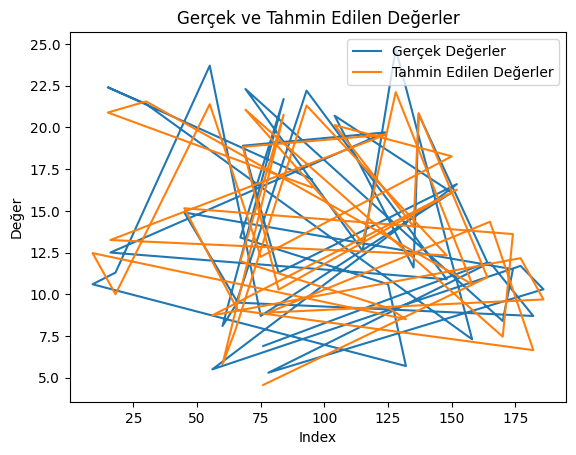

In [25]:
index = y_test.index
gercek_degerler = y_test["Sales"]
tahmin_degerler = y_test["tahmin"]

# Grafik oluşturma
plt.plot(index, gercek_degerler, label='Gerçek Değerler')
plt.plot(index, tahmin_degerler, label='Tahmin Edilen Değerler')

# Eksen etiketleri ve başlık
plt.xlabel('Index')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerler')

# İlgili şekilleri ve açıklamaları gösterme
plt.legend()

# Grafik gösterme
plt.show()